In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr 
!pip install netcdf4

import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
path = '/Users/egust/python/Float/data/'
files=glob.glob(path+'*.nc')
files[0]

'/Users/egust/python/Float/data\\5904184_HRQC.nc'

In [4]:
ds = xr.open_dataset(files[0])
ds;

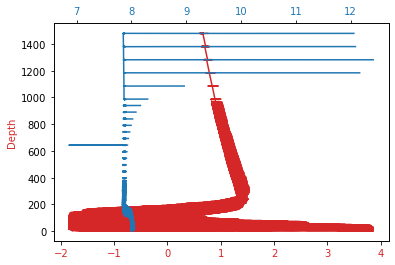

In [5]:
# A graph with 2 x-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twiny() # Create a second axes that shares the same y-axis

color = 'tab:red'
ax1.plot(ds.Temperature, ds.Depth, color=color)
ax1.set_ylabel('Depth', color=color)
ax1.tick_params(axis='x', labelcolor=color)

color = 'tab:blue'
ax2.plot(ds.pHinsitu, ds.Depth, color=color)
ax2.set_ylabel('pHinsitu', color=color)  
ax2.tick_params(axis='x', labelcolor=color) #How to get one measure of depth throughout the graph? -reverse

In [6]:
# How many floats are there
print('There are '+ str(len(files)) +' floats')

There are 128 floats


In [7]:
len(ds.pHinsitu)

153

In [8]:
# How many active floats are there
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]

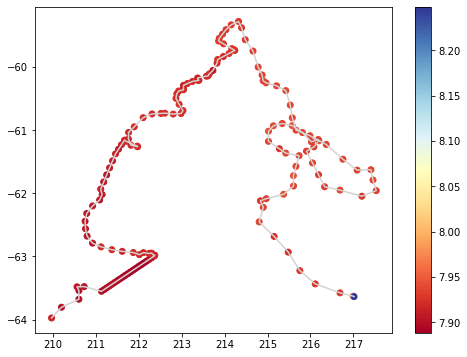

In [10]:
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Add a colorbar
cbar = plt.colorbar();

In [41]:
# want to find all of the floats with in the location of bin 1
bin1= []
bin2= []
bin3= []
bin4= []
bin5= []
bin6= []
bin7= []
bin8= []
bin9= []
bin10= []
bin11= []
bin12= []

for i in range(len(files)):
    ds = xr.open_dataset(files[i])
    
    if ds.Lon.mean() >= 0 and ds.Lon.mean() < 30:
        bin1.append(files[i])
    elif ds.Lon.mean() >= 30 and ds.Lon.mean() < 60:
        bin2.append(files[i])
    elif ds.Lon.mean() >= 60 and ds.Lon.mean() < 90:
        bin3.append(files[i])
    elif ds.Lon.mean() >= 90 and ds.Lon.mean() < 120:
        bin4.append(files[i])
    elif ds.Lon.mean() >= 120 and ds.Lon.mean() < 150:
        bin5.append(files[i])
    elif ds.Lon.mean() >= 150 and ds.Lon.mean() < 180:
        bin6.append(files[i])
    elif ds.Lon.mean() >= 180 and ds.Lon.mean() < 210:
        bin7.append(files[i])
    elif ds.Lon.mean() >= 210 and ds.Lon.mean() < 240:
        bin8.append(files[i])
    elif ds.Lon.mean() >= 240 and ds.Lon.mean() < 270:
        bin9.append(files[i])
    elif ds.Lon.mean() >= 270 and ds.Lon.mean() < 300:
        bin10.append(files[i])
    elif ds.Lon.mean() >= 300 and ds.Lon.mean() < 330:
        bin11.append(files[i])
    elif ds.Lon.mean() >= 330 and ds.Lon.mean() <= 360:
        bin12.append(files[i])

    

In [42]:
#Check the files that were added onto list
bin1

['/Users/egust/python/Float/data\\5904468_HRQC.nc',
 '/Users/egust/python/Float/data\\5904471_HRQC.nc',
 '/Users/egust/python/Float/data\\5906008_HRQC.nc',
 '/Users/egust/python/Float/data\\5906033_HRQC.nc',
 '/Users/egust/python/Float/data\\5906034_HRQC.nc']

In [14]:
def pHmonitor(ds):
    """ Allows you to check if the float is faulty """
    pHmonitor = []
    for i in range(len(ds.pHinsitu)):
        if ds.pHinsitu[i].mean() >= 0 and ds.pHinsitu[i].mean() <= 14:
            pHmonitor.append('True')
        else:
            pHmonitor.append('False')
    if 'False' in pHmonitor:
        Faulty = 'Faulty'
    elif 'False' not in pHmonitor:
        Faulty = 'Not Faulty'
    return Faulty

In [39]:
def Find_Not_Faulty(bin_):
    not_faulty = []
    for i in range(len(bin_)):
        ds = xr.open_dataset(bin_[i])
        if pHmonitor(ds) == 'Not Faulty':
            not_faulty.append(i)
    return not_faulty

In [49]:
for i in Find_Not_Faulty(bin1):
    print(i)

2
3


In [60]:
# want to find all of the Working floats with in the location of bin 1
bin1_= []
bin2_= []
bin3_= []
bin4_= []
bin5_= []
bin6_= []
bin7_= []
bin8_= []
bin9_= []
bin10_= []
bin11_= []
bin12_= []

In [61]:
bins_=[bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10, bin11, bin12]
bins_empty=[bin1_, bin2_, bin3_, bin4_, bin5_, bin6_, bin7_, bin8_, bin9_, bin10_, bin11_, bin12_]
for i, j in zip(bins_, bins_empty):
    for k in Find_Not_Faulty(i):
        j.append(i[k])

In [66]:
print(bin1_)

['/Users/egust/python/Float/data\\5906008_HRQC.nc', '/Users/egust/python/Float/data\\5906033_HRQC.nc']


In [117]:
ds = xr.open_dataset(bin1_[0])
ds

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 559, N_PROF: 12)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 06/23/2...

In [119]:
ds.pHinsitu

<xarray.DataArray 'pHinsitu' (N_PROF: 12, N_LEVELS: 559)>
array([[7.8845, 7.8845, 7.8872, ...,    nan,    nan,    nan],
       [7.8905, 7.8964, 7.8963, ...,    nan,    nan,    nan],
       [7.896 , 7.8945, 7.8963, ...,    nan,    nan,    nan],
       ...,
       [7.8895, 7.8948, 7.8952, ..., 8.0407,    nan,    nan],
       [7.8906, 7.8855, 7.8919, ..., 8.0255,    nan,    nan],
       [7.894 , 7.8948, 7.8905, ...,    nan,    nan,    nan]])
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    units:    Total

In [121]:
mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
len(mean_pH)

12

In [120]:
ds.mon_day_yr

<xarray.DataArray 'mon_day_yr' (N_PROF: 12)>
array([b'03/24/2019', b'04/03/2019', b'04/13/2019', b'04/23/2019',
       b'05/03/2019', b'05/13/2019', b'05/23/2019', b'06/02/2019',
       b'06/12/2019', b'06/23/2019', b'07/03/2019', b'07/13/2019'],
      dtype='|S10')
Dimensions without coordinates: N_PROF

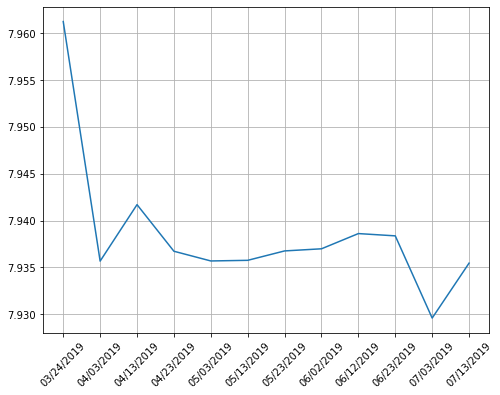

In [123]:
plt.figure(figsize=(8,6))
plt.plot(ds.mon_day_yr, mean_pH)
plt.xticks(rotation=45)
plt.grid(True)

In [159]:
df = pd.DataFrame(data={'pHmean':[mean_pH[i].to_pandas() for i in range(len(mean_pH))],
                        'data_10d':ds.mon_day_yr})
str(df.data_10d[0])

"b'03/24/2019'"

In [142]:
a=[mean_pH[i].to_pandas() for i in range(len(mean_pH))] 
a[0].dtype

dtype('float64')

In [145]:
ds.mon_day_yr.to_pandas()

b'03/24/2019'

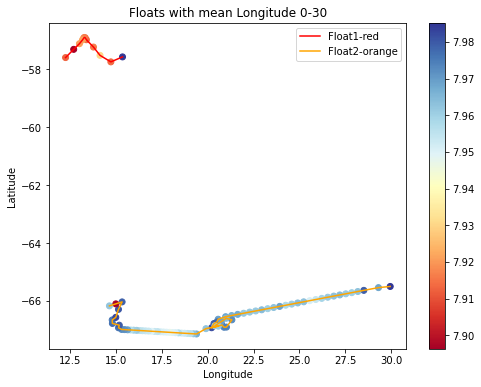

In [105]:
plt.figure(figsize=(8,6))
for i in range(len(bin1_)):
    ds = xr.open_dataset(bin1_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 0-30')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin1_)])

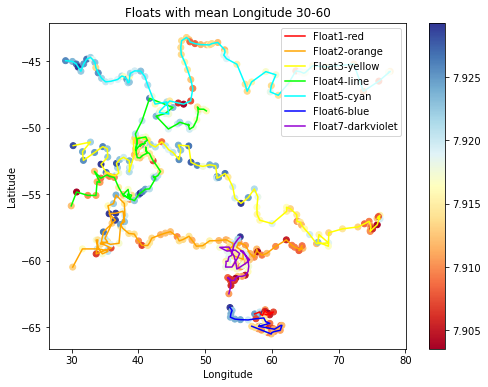

In [106]:
plt.figure(figsize=(8,6))
for i in range(len(bin2_)):
    ds = xr.open_dataset(bin2_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 30-60')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin2_)])

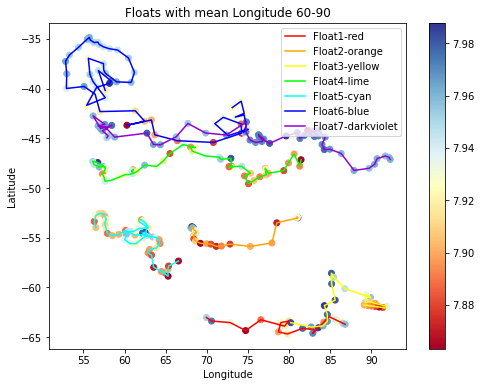

In [107]:
plt.figure(figsize=(8,6))
for i in range(len(bin3_)):
    ds = xr.open_dataset(bin3_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 60-90')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin3_)])

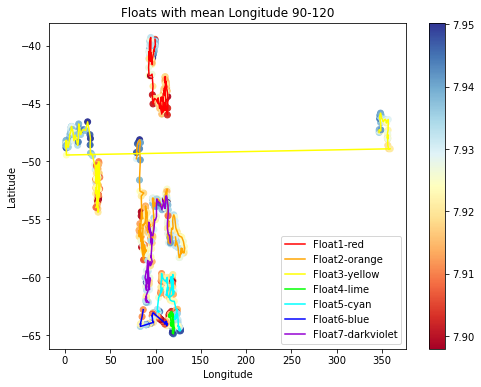

In [108]:
plt.figure(figsize=(8,6))
for i in range(len(bin4_)):
    ds = xr.open_dataset(bin4_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 90-120')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin4_)])

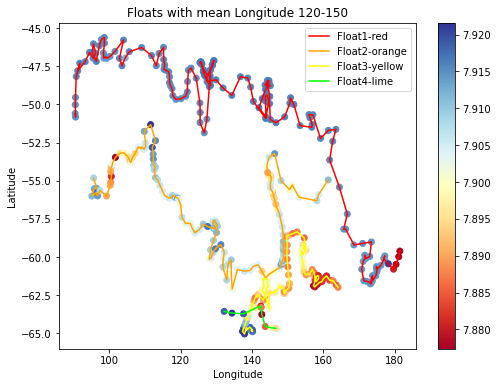

In [109]:
plt.figure(figsize=(8,6))
for i in range(len(bin5_)):
    ds = xr.open_dataset(bin5_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 120-150')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin5_)])

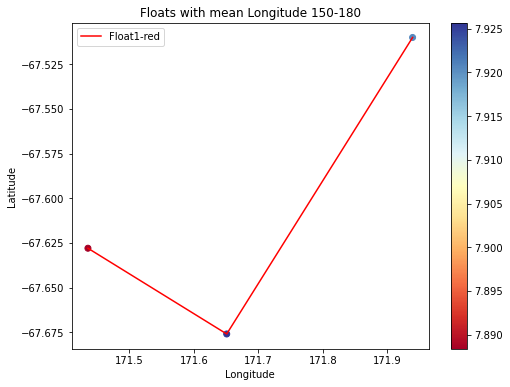

In [110]:
plt.figure(figsize=(8,6))
for i in range(len(bin6_)):
    ds = xr.open_dataset(bin6_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 150-180')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin6_)])

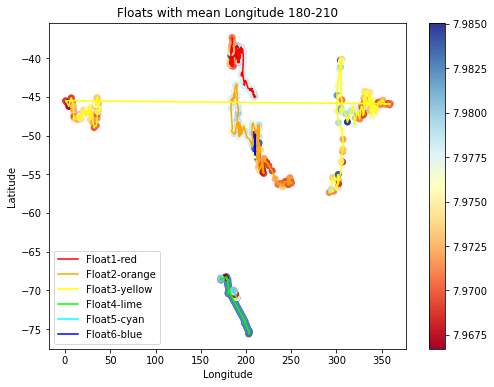

In [111]:
plt.figure(figsize=(8,6))
for i in range(len(bin7_)):
    ds = xr.open_dataset(bin7_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 180-210')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin7_)])

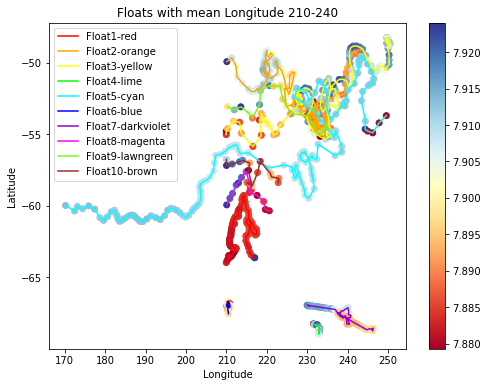

In [112]:
plt.figure(figsize=(8,6))
for i in range(len(bin8_)):
    ds = xr.open_dataset(bin8_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 210-240')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin8_)])

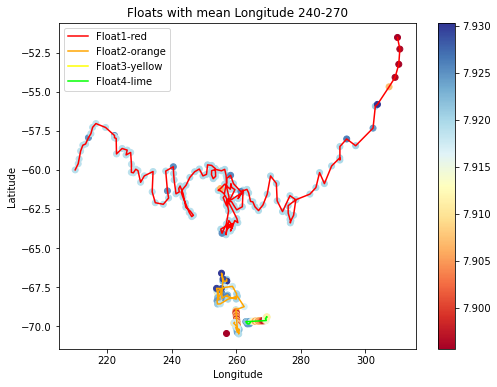

In [113]:
plt.figure(figsize=(8,6))
for i in range(len(bin9_)):
    ds = xr.open_dataset(bin9_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 240-270')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin9_)])

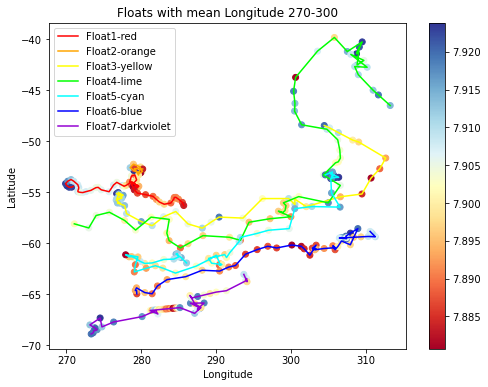

In [114]:
plt.figure(figsize=(8,6))
for i in range(len(bin10_)):
    ds = xr.open_dataset(bin10_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 270-300')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin10_)])

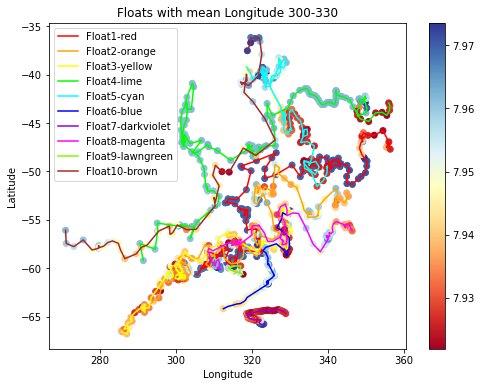

In [115]:
plt.figure(figsize=(8,6))
for i in range(len(bin11_)):
    ds = xr.open_dataset(bin11_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 300-330')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin11_)])

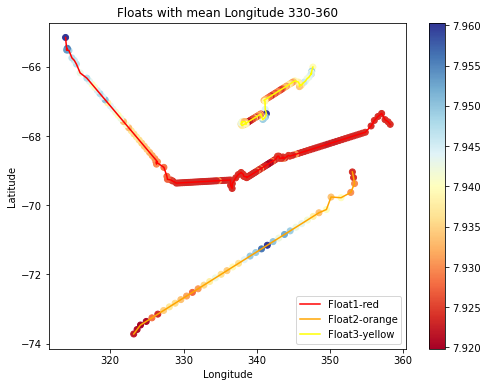

In [116]:
plt.figure(figsize=(8,6))
for i in range(len(bin12_)):
    ds = xr.open_dataset(bin12_[i])
    mean_pH = [ds.pHinsitu[j].mean() for j in range(0,len(ds.pHinsitu))]
    # Simple map of a float track
    colors = ['red','orange','yellow','lime', 'cyan','blue','darkviolet','magenta','lawngreen','brown' ]
    plt.plot(ds.Lon, ds.Lat, c=colors[i])
    plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')
    # Add a colorbar
cbar = plt.colorbar();
floats= ['Float1-red','Float2-orange','Float3-yellow','Float4-lime', 'Float5-cyan',
         'Float6-blue','Float7-darkviolet','Float8-magenta','Float9-lawngreen','Float10-brown']
plt.title('Floats with mean Longitude 330-360')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(floats[0:len(bin12_)])